1. Introduction

In this tutorial different resampling methods are presented: hold-out method, k-fold cross validation and leave-one-out cross validation. We start with bias-variance tradeoff and will analyse different techniques in a real example and classify wines with random forest.

2. Bias-Variance Tradeoff

In machine learning two errors should be minimized at the same time: bias and variance.

Bias: Bias is an error caused by false assumptions in algorithm. High bias might cause underfitting. Variance: Variance is an error stemming from sensitivity in training data. A high variance might cause overfitting. In this case noise in training data is modeled rather than the underlying relationship. Both errors cannot be minimized at the same time, so a reasonable tradeoff is required.

3. Resampling Methods

There are different resampling methods. In this post hold-out, k-fold cross validation and leave-one-out cross validation are presented.


3.1 Holdout Method

Easiest approach is to take a certain ratio of data, e.g. say 80 % for training, and the residual 20 % for testing. Problems might be that it is not affordable to hold back a subset for validation. Also, the split might have a negative impact on the validation error.

Some methods have been developed to overcome these limitations.

3.2 k-Fold Cross Validation (CV)

This method is a generalisation of hold-out method. Data is randomly splitted in k-folds, typically 10. Let’s assume 10 folds for now. Folds 2 to 10 are used for training the model, and the residual first fold for validation of the model. Now, the process is repeated. But this time the second fold is used for validation and folds 1, 3 to 10 are used for training the model. This process is repeated k times.

Final predictor is the average of the models.

3.3 Leave-One-Out Cross Validation (LOOCV)

This method requires (n-1) data for training, and 1 data set for validation. This process is repeated n times. It is numerically very costly, but also is prone to overfitting.


# Packages

In [16]:
import numpy as np
import pandas as pd
from plotnine import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score
import seaborn as sns

# Data Understanding


Wine variants of Portuguese “Vinho Verde” are analysed with regards to their chemical properties. Finally, we are interested how these chemical properties influence wine quality.

These are our independent variables:

1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol

This is our dependent variable:

12. quality (score between 0 and 10)


# Data Import

In [17]:
wine = pd.read_csv('./data/winequality-red.csv', sep=';')

In [18]:
X, y = np.array(wine.loc[:, wine.columns != 'quality']), np.array(wine.loc[:, wine.columns == 'quality'])

In [19]:
print(X.shape, y.shape)

(1599, 11) (1599, 1)


## Train / Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)
r2_score(y_true=y_test, y_pred=y_pred)
# run this several times to show how much the results vary

0.3541265122243432

## Cross Validation

In [21]:
kf = KFold(n_splits=10, shuffle=True)  # 10-fold CV
kf.get_n_splits(X)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=True)


In [22]:
scores = []  # initialise the individual scores
model = LinearRegression()
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores, np.median(scores))
    # you see that the data is not shuffled --> set parameter shuffle to True, also specify random_state

[0.3780705994936544, 0.27529606502407056, 0.3719860272929104, 0.35638096595095636, 0.3827342486852786, 0.2871647995563421, 0.29911739842410023, 0.2980640538185917, 0.38924439991173837, 0.40465855301848863] 0.3641834966219334


Often you are only interested in cross validation score, so you only calculate this.

In [23]:
# if only the average result is requested:
np.median(cross_val_score(model, X, y, cv=10, scoring='r2'))

0.3086285910151066

## Leave One Out CV

In [24]:
scores = []  # initialise the individual scores
model = LinearRegression()

loocv = LeaveOneOut()
loocv.get_n_splits(X)

for train_index, test_index in loocv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
scores

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [25]:
np.mean(scores)

0.0

Why is this happening? 

Problem: R2 is 0, if there is only one predicted y.

Solution: add all predicted values to a list and create the correlation plot for these values.

In [26]:
y_preds = []  # initialise the individual scores
y_act = []
model = LinearRegression()

loocv = LeaveOneOut()
loocv.get_n_splits(X)

for train_index, test_index in loocv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_preds.append(model.predict(X_test)[0][0])
    y_act.append(y_test[0][0])
y_preds[0:10]  # get the first results

[5.03297259107995,
 5.138689924680907,
 5.210506854729854,
 5.692232553728026,
 5.032972591079943,
 5.065819581541202,
 5.107415709622124,
 5.336126541734258,
 5.331557293738079,
 5.664213725046462]

In [27]:
df = pd.DataFrame({'y_act': y_act, 'y_preds': y_preds})

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


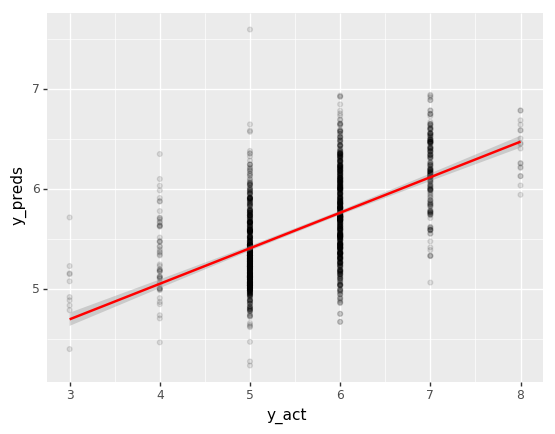

<ggplot: (142207928966)>

In [28]:
(ggplot(df)
 + aes(x='y_act', y='y_preds')
 + geom_point(alpha=0.1)
 + geom_smooth(method='lm', color='red')
)